In [1]:
%pip install numpy

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Dell\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [2]:
%pip install pydlm

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Dell\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [3]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Dell\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [4]:
%pip install openpyxl


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Dell\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
#import data
df = pd.read_csv('../Datasets/NVDA Historical Data.csv')

#print data 
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,1/3/2017,25.50,26.10,26.59,24.84,150.20M,-4.42%
1,1/4/2017,26.10,25.85,26.38,25.38,119.92M,2.35%
2,1/5/2017,25.43,26.13,26.45,25.26,98.43M,-2.57%
3,1/6/2017,25.77,25.71,26.06,25.30,82.29M,1.34%
4,1/9/2017,26.82,25.88,27.00,25.88,91.62M,4.07%


In [7]:
#Bỏ dòng bị trống dự liệu
df = df.dropna()
#Chuyển đổi dữ liệu cột Vol. sang số
df['Vol.'] = df['Vol.'].str.replace('M', '').astype(float) * 1000000


In [8]:
df

,Date,Price,Open,High,Low,Vol.,Change %
0,1/3/2017,25.50,26.10,26.59,24.84,150200000.0,-4.42%
1,1/4/2017,26.10,25.85,26.38,25.38,119920000.0,2.35%
2,1/5/2017,25.43,26.13,26.45,25.26,98430000.0,-2.57%
3,1/6/2017,25.77,25.71,26.06,25.30,82290000.0,1.34%
4,1/9/2017,26.82,25.88,27.00,25.88,91620000.0,4.07%
...,...,...,...,...,...,...,...
1619,6/9/2023,387.70,390.37,397.11,385.67,42770000.0,0.68%
1620,6/12/2023,394.82,392.00,395.30,386.18,38440000.0,1.84%
1621,6/13/2023,410.22,401.86,411.01,397.40,60770000.0,3.90%
1622,6/14/2023,429.97,408.24,430.00,405.52,72940000.0,4.81%


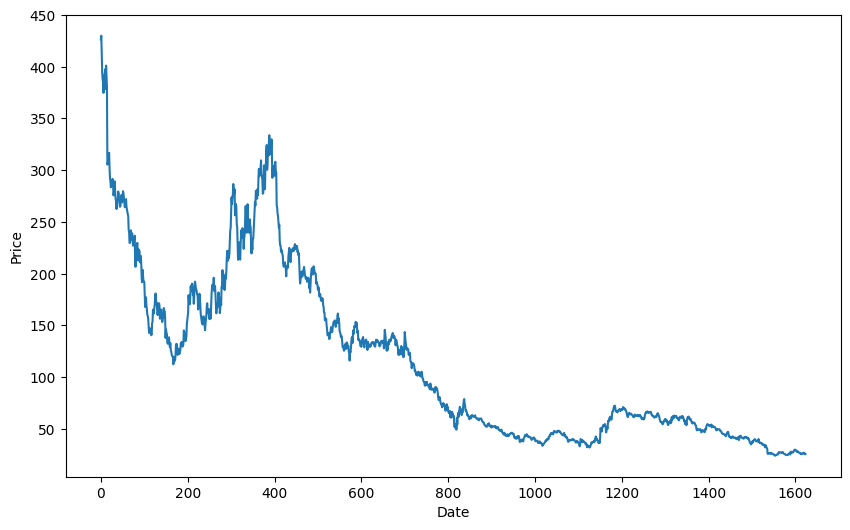

In [9]:
#Đảo ngược dữ liệu cho mô hình
df = df[::-1]

figure=df['Price'].values
plt.figure(figsize=(10,6))
plt.plot(figure)
plt.xlabel('Date')
plt.ylabel('Price') 
plt.show()

In [10]:
#Xây dựng mô hỉnh với Bayesian Dynamic Linear Model
from pydlm import dlm, trend, seasonality, dynamic, autoReg, longSeason


In [11]:
df = df.reset_index(drop=True)
 # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [12]:
from pydlm import dlm, trend, seasonality

# Tạo model DLM
my_dlm = dlm(train_data['Price'])

# Thêm trend component
my_dlm = my_dlm + trend(degree=1, name='trend', w=1.0)

# Thêm seasonality component với chu kỳ 52 tuần
my_dlm = my_dlm + seasonality(period=52, name='season', w=1.0)

In [13]:

# Fit the DLM to the training data
my_dlm.fit()


Initializing models...
Initialization finished.
Starting forward filtering...


Forward filtering completed.
Starting backward smoothing...
Backward smoothing completed.


In [14]:
# Predict on validation set
my_dlm.predictN(N=30)


([29.296439852685964,
  30.028879504307728,
  30.0924003417668,
  29.535285537113158,
  29.70710015265371,
  29.744938752400046,
  29.67119110285028,
  28.888291139292797,
  28.976791453065236,
  28.561476334736096,
  27.92127250036707,
  28.479182431841394,
  28.670732245051394,
  29.28360965965973,
  28.82025288331139,
  28.805138638505667,
  28.273811247345954,
  28.344755185799954,
  27.550075137034906,
  27.078781979395604,
  27.508180666205845,
  29.44325865785086,
  28.90805909113967,
  28.290841660306537,
  27.931301061250522,
  28.517663481960046,
  27.98178127369677,
  27.070977307784094,
  26.992585186796084,
  26.853962653069036],
 [1299.7850407640617,
  1294.6441263582647,
  1289.550959424163,
  1284.5050623428306,
  1279.5059612967589,
  1274.553186282741,
  1269.646271123449,
  1264.7847534777277,
  1259.9653302417087,
  1255.1931739702563,
  1250.4650864790347,
  1245.7806025150962,
  1241.1392730816478,
  1236.54065563533,
  1231.9843127385316,
  1227.4698115732267,
  

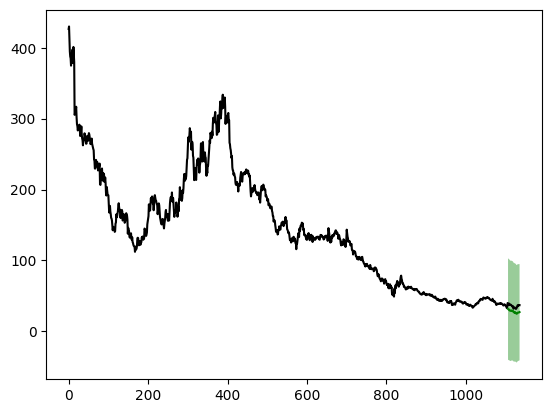

In [15]:
#Dự đoán trên tập train
my_dlm.plotPredictN(N=30, date=my_dlm.n-30)


In [16]:
# Predict on validation data
val_preds, val_vars = my_dlm.predictN(N=val_size)

# Predict on test data
test_preds, test_vars = my_dlm.predictN(N=test_size)
# Predict on train data
train_preds, train_vars = my_dlm.predictN(N=train_size)

In [17]:
# Các giá trị thực tế cho validation, test và train data
val_actual = val_data['Price'].values
test_actual = test_data['Price'].values
train_actual = train_data['Price'].values

In [18]:
%pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Dell\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, mean_absolute_error

# Regression metrics
test_rmse = np.sqrt(np.mean((test_preds - test_actual)**2))
test_mse = mean_squared_error(test_actual, test_preds)
test_mae = mean_absolute_error(test_actual, test_preds)

valid_rmse = np.sqrt(np.mean((val_preds - val_actual)**2))
valid_mse = mean_squared_error(val_actual, val_preds)
valid_mae = mean_absolute_error(val_actual, val_preds)

print('Testing RMSE:', test_rmse)
print('Testing MSE:', test_mse)
print('Testing MAE:', test_mae)

print('Validation RMSE:', valid_rmse)
print('Validation MSE:', valid_mse)
print('Validation MAE:', valid_mae)

Testing RMSE: 48.854148658010345
Testing MSE: 2386.7278410989743
Testing MAE: 47.43233473086412
Validation RMSE: 12.826125795536631
Validation MSE: 164.5095029229302
Validation MAE: 12.402560422141772


In [20]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

In [21]:
# Dự đoán 30 ngày tiếp theo sau tập validation
future_preds, future_vars = my_dlm.predictN(N=30)

# In ra dự đoán cho 30 ngày tiếp theo
print("Predictions for the next 30 days:")
print(future_preds)

Predictions for the next 30 days:
[29.296439852685964, 30.028879504307728, 30.0924003417668, 29.535285537113158, 29.70710015265371, 29.744938752400046, 29.67119110285028, 28.888291139292797, 28.976791453065236, 28.561476334736096, 27.92127250036707, 28.479182431841394, 28.670732245051394, 29.28360965965973, 28.82025288331139, 28.805138638505667, 28.273811247345954, 28.344755185799954, 27.550075137034906, 27.078781979395604, 27.508180666205845, 29.44325865785086, 28.90805909113967, 28.290841660306537, 27.931301061250522, 28.517663481960046, 27.98178127369677, 27.070977307784094, 26.992585186796084, 26.853962653069036]


In [22]:
#Tạo một mảng chứa toàn bộ dữ liệu của tập train, validation và test
allPreds = np.concatenate([train_preds,test_preds, val_preds])


In [23]:
#Tạo mảng index tương ứng với tập allPreds
days = np.arange(0, len(allPreds))


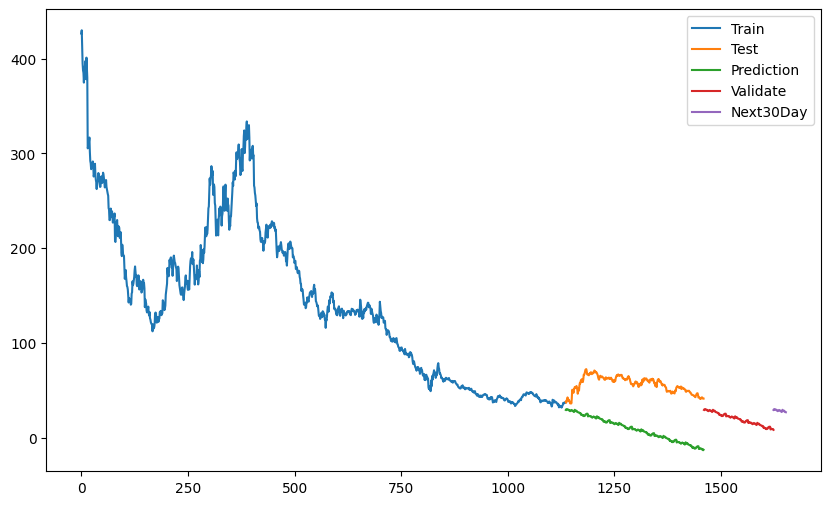

In [24]:
#Vẽ hình
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
#plt.plot(val_data.index, val_data['Price'])
plt.plot(days[len(train_data.index):len(train_data.index)+len(test_preds)], test_preds, label='Prediction')
plt.plot(days[len(train_data.index)+len(test_preds):], val_preds, label='Validate')
plt.plot(last_data,future_preds, label='Next30Day')

#plt.plot(pred_df.index, pred_df['Price'], label='Predicted')
plt.legend(['Train', 'Test', 'Prediction', 'Validate', 'Next30Day'])
plt.show()